In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 14]
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
class Parameters:
    POPULATION = 'pop_rate'
    MIGRATION = 'migr_rate'
    WORKING_AGE = 'age_rate'
    EMPLOYMENT = 'empl_rate'
    UNEMPLOYED = 'unempl_rate'
    REVENUE = 'revenue_rate'

path = '../figures'

In [15]:
# df = pd.ExcelFile('new_data.xlsx')

In [44]:
# df1 = pd.read_excel(df,'summary')

header_types = {
    'unit_id': str,
    'teryt_id': str
}

df1 = pd.read_csv('../data/processed/stats/summary.csv', sep=',', decimal='.', dtype=header_types)
df1 = df1.loc[df1['type'].isin(['L', 'M', 'S'])]

In [17]:
df1.columns

Index(['unit_id', 'teryt_id', 'name', 'level', 'kind', 'period_start',
       'period_end', 'population_start', 'population_end', 'type', 'pop_rate',
       'pop_points', 'migr_rate', 'migr_points', 'age_rate', 'age_points',
       'empl_rate', 'empl_points', 'unempl_rate', 'unempl_points',
       'revenue_rate', 'revenue_points', 'score', 'status'],
      dtype='object')

In [18]:
df1.head()

,unit_id,teryt_id,name,level,kind,period_start,period_end,population_start,population_end,type,...,age_rate,age_points,empl_rate,empl_points,unempl_rate,unempl_points,revenue_rate,revenue_points,score,status
0,011212001011,1201011,Bochnia,6,1,2003,2008,29423,29605,M,...,0.0041,3,0.0385,3,-0.0079,1,0.1411,2,14,B
1,011212001011,1201011,Bochnia,6,1,2004,2009,29536,29748,M,...,0.0019,3,0.0235,2,-0.0048,1,0.1018,2,13,C
2,011212001011,1201011,Bochnia,6,1,2005,2010,29487,30166,M,...,0.0030,3,0.0383,3,-0.0039,4,0.0821,2,17,B
3,011212001011,1201011,Bochnia,6,1,2006,2011,29404,30300,M,...,0.0018,3,0.0291,3,-0.0007,2,0.0628,2,15,B
4,011212001011,1201011,Bochnia,6,1,2007,2012,29444,30303,M,...,0.0004,3,0.0192,2,0.0028,0,0.0716,2,12,C


In [19]:
# dfu = pd.ExcelFile('data3.xlsx')
# units = pd.read_excel(dfu,'units')

# df1['functionality']=np.nan
# for i in range(len(df1)):
#     try:
#         df1.loc[i,'functionality']=units[units['teryt_id']==df1.iloc[i,1]]['functionality'].values[0]
#     except:
#         df1.loc[i,'functionality']='J'


In [8]:
df1.head()

,unit_id,teryt_id,name,level,kind,period_start,period_end,population_start,population_end,type,...,age_rate,age_points,empl_rate,empl_points,unempl_rate,unempl_points,revenue_rate,revenue_points,score,status
0,011212001011,1201011,Bochnia,6,1,2003,2008,29423,29605,M,...,0.0041,3,0.0385,3,-0.0079,1,0.1411,2,14,B
1,011212001011,1201011,Bochnia,6,1,2004,2009,29536,29748,M,...,0.0019,3,0.0235,2,-0.0048,1,0.1018,2,13,C
2,011212001011,1201011,Bochnia,6,1,2005,2010,29487,30166,M,...,0.0030,3,0.0383,3,-0.0039,4,0.0821,2,17,B
3,011212001011,1201011,Bochnia,6,1,2006,2011,29404,30300,M,...,0.0018,3,0.0291,3,-0.0007,2,0.0628,2,15,B
4,011212001011,1201011,Bochnia,6,1,2007,2012,29444,30303,M,...,0.0004,3,0.0192,2,0.0028,0,0.0716,2,12,C


In [56]:
# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#         'size': 24,
#         }

def score_to_city_size(df, period_start=2006, types_colors={"L": "#0492C2", "M": "#74B72E", "S":"#F9E076",  "R":"#c11be4"}, path="", save=True):
    sns.boxplot(data=df[df['period_start']==period_start][['type','score']].sort_values(by='type'), x="type", y="score", palette=types_colors)
    plt.title(str(period_start)+"-"+str(period_start+5), fontsize=20)

    plt.xlabel('city size', fontsize=24)
    plt.ylabel('score', fontsize=24)
    plt.ylim(-1, 26)

    # plt.xlabel('city size', fontsize=24, fontname='Calibri')
    # plt.ylabel('score', fontsize=24, fontname='Calibri')


    plt.tick_params(axis='both', which='major', labelsize=16)
    if save:
        plt.savefig(f'../figures/boxplot_{period_start}_{period_start+5}.png', dpi=600)

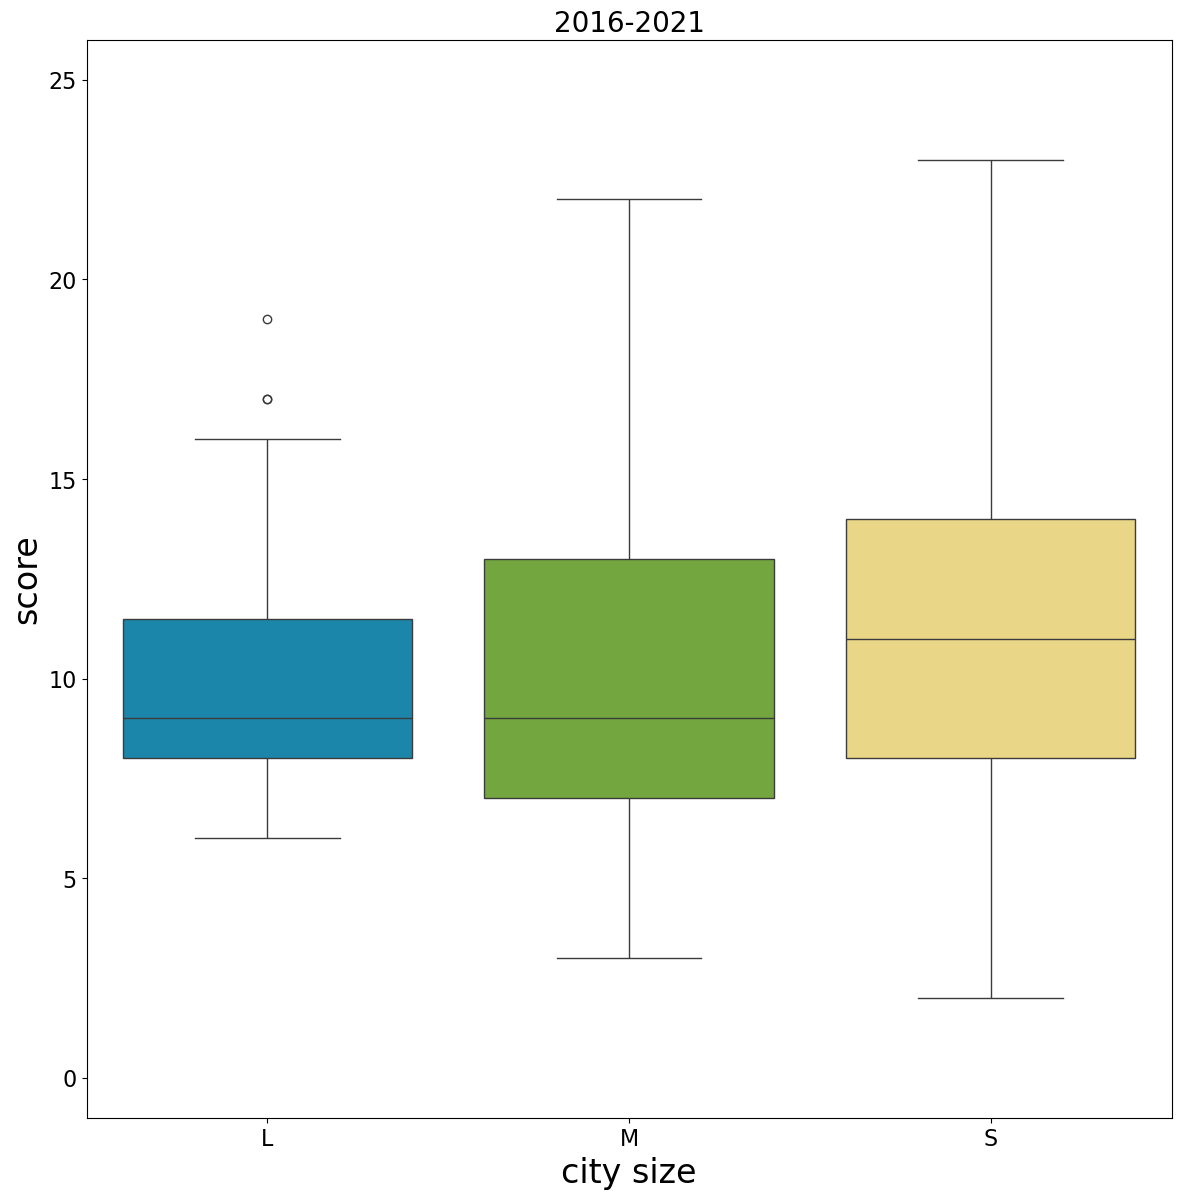

In [59]:
# score_to_city_size(df1, period_start=2006)
# score_to_city_size(df1, period_start=2011)
score_to_city_size(df1, period_start=2016)

In [11]:
def score_by_f_type(df, period_start=2006, path="", save=False):
    my_pal = {"A": "#922d17", "B": "#b97a70", "C":"#e94524", "D":"#f49190", "E": "#f48029", "F":"#837c1e", "G": "#736ab0", "H": "#8bbf3e", "I": "#c8de85", "J": "#44bfed"}
    temp = df[df["period_start"]==period_start]
    sns.boxplot(data=temp[['score','functionality']].sort_values(by='functionality'), x="functionality", y="score", palette=my_pal)
    plt.title(str(period_start)+"-"+str(period_start+5), fontsize=20)
    plt.xlabel('Functionality', fontsize=20)
    plt.ylabel('Score', fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=16)
    if save:
        plt.savefig(path+"functionality-"+str(period_start)+"-"+str(period_start+5)+'.png')

In [12]:
score_by_f_type(df1)

KeyError: "['functionality'] not in index"

In [ ]:
df1

,unit_id,teryt_id,name,level,kind,period_start,period_end,population_start,population_end,type,...,age_points,empl_rate,empl_points,unempl_rate,unempl_points,revenue_rate,revenue_points,score,status,functionality
0,11212001011,1201011,Bochnia,6,1,2003,2008,29423,29605,M,...,3,0.0385,3,-0.0079,1,0.1411,2,14,B,E
1,11212001011,1201011,Bochnia,6,1,2004,2009,29536,29748,M,...,3,0.0235,2,-0.0048,1,0.1018,2,13,C,E
2,11212001011,1201011,Bochnia,6,1,2005,2010,29487,30166,M,...,3,0.0383,3,-0.0039,4,0.0821,2,17,B,E
3,11212001011,1201011,Bochnia,6,1,2006,2011,29404,30300,M,...,3,0.0291,3,-0.0007,2,0.0628,2,15,B,E
4,11212001011,1201011,Bochnia,6,1,2007,2012,29444,30303,M,...,3,0.0192,2,0.0028,0,0.0716,2,12,C,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34673,71427338053,1438053,Wiskitki,6,3,2012,2017,0,0,S,...,3,-0.0418,0,-0.0027,0,0.2207,4,13,C,F
34674,71427338053,1438053,Wiskitki,6,3,2013,2018,0,0,S,...,3,-0.0114,0,-0.0044,0,0.1027,4,13,C,F
34675,71427338053,1438053,Wiskitki,6,3,2014,2019,0,0,S,...,3,0.1352,4,-0.0040,0,0.0643,2,16,B,F
34676,71427338053,1438053,Wiskitki,6,3,2015,2020,0,0,S,...,3,0.1266,4,-0.0027,1,0.1039,3,18,B,F


In [ ]:
def correlation(df, col1, col2, period_start=2006, path="", save=False):
    cor = np.corrcoef(df[df['period_start']==period_start][col1], df[df['period_start']==period_start][col2])[0,1]
    plt.scatter(df[df['period_start']==period_start][col1], df[df['period_start']==period_start][col2])
    plt.title("Correlation between "+col1+" and "+col2+" - period start = "+str(period_start)+
              "\n correlation value = "+str(cor), fontsize=20)
    plt.xlabel(col1, fontsize=20)
    plt.ylabel(col2, fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=16)
    if save:
        plt.savefig(path+"Correlation between "+col1+" and "+col2+" - period start = "+str(period_start)+'.png')

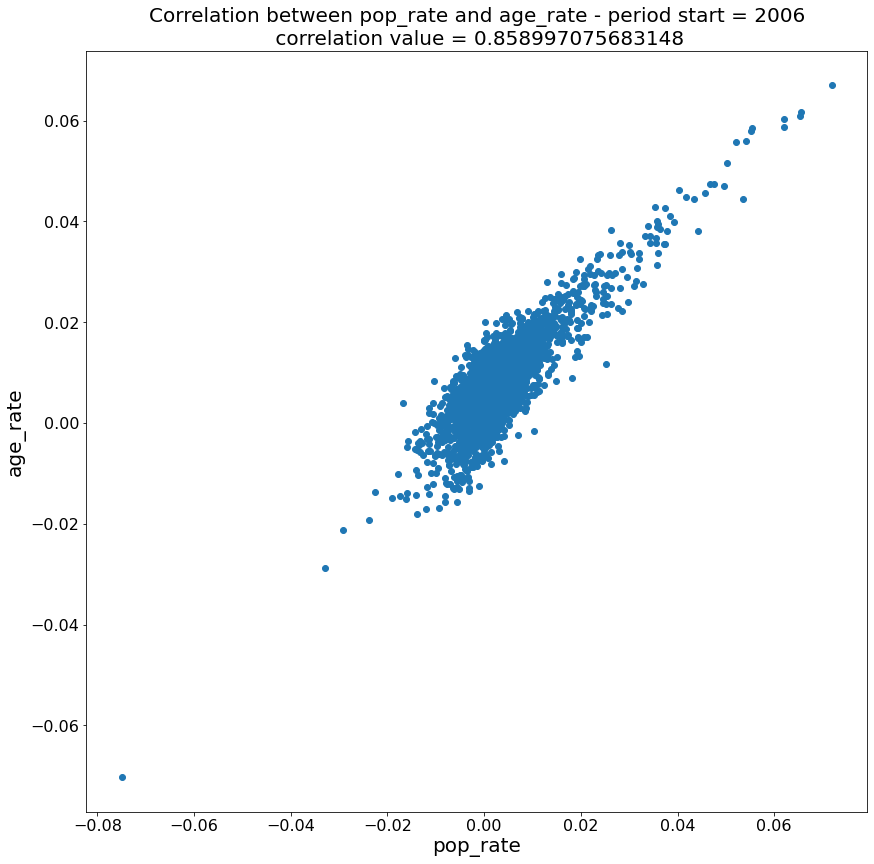

In [ ]:
correlation(df1, Parameters.POPULATION, Parameters.WORKING_AGE, period_start=2006)

In [ ]:
from IPython.display import display
param_list = [Parameters.POPULATION, Parameters.MIGRATION, Parameters.WORKING_AGE, Parameters.EMPLOYMENT,
              Parameters.UNEMPLOYED, Parameters.REVENUE]

corr_plots = []
a = df1[df1["period_start"]==year][param_list].corr()
for year in range(2003, 2017):
    corr = df1[df1["period_start"]==year][param_list].corr()
    x = corr.style.background_gradient(cmap='coolwarm')
    print(year)
    display(x)
    if year != 2003:
        a += corr
a/(2017-2003)

2003


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.871428,0.903048,0.247913,-0.108676,0.232663
migr_rate,0.871428,1.000000,0.795620,0.212017,0.021327,0.206093
age_rate,0.903048,0.795620,1.000000,0.214859,-0.068866,0.174465
empl_rate,0.247913,0.212017,0.214859,1.000000,-0.078699,0.160457
unempl_rate,-0.108676,0.021327,-0.068866,-0.078699,1.000000,-0.024340
revenue_rate,0.232663,0.206093,0.174465,0.160457,-0.024340,1.000000


2004


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.874470,0.886107,0.244085,-0.072386,0.248741
migr_rate,0.874470,1.000000,0.786921,0.209517,0.038746,0.224942
age_rate,0.886107,0.786921,1.000000,0.231403,-0.016442,0.233682
empl_rate,0.244085,0.209517,0.231403,1.000000,-0.070313,0.159659
unempl_rate,-0.072386,0.038746,-0.016442,-0.070313,1.000000,-0.042180
revenue_rate,0.248741,0.224942,0.233682,0.159659,-0.042180,1.000000


2005


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.786055,0.874175,0.259304,-0.076238,0.192854
migr_rate,0.786055,1.000000,0.660246,0.240205,0.097488,0.179326
age_rate,0.874175,0.660246,1.000000,0.247974,-0.046348,0.184793
empl_rate,0.259304,0.240205,0.247974,1.000000,-0.016255,0.150260
unempl_rate,-0.076238,0.097488,-0.046348,-0.016255,1.000000,-0.019857
revenue_rate,0.192854,0.179326,0.184793,0.150260,-0.019857,1.000000


2006


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.806266,0.858997,0.248472,-0.025517,0.075591
migr_rate,0.806266,1.000000,0.674007,0.242431,0.090319,0.049298
age_rate,0.858997,0.674007,1.000000,0.258274,0.010132,0.123093
empl_rate,0.248472,0.242431,0.258274,1.000000,0.017708,0.127737
unempl_rate,-0.025517,0.090319,0.010132,0.017708,1.000000,0.005760
revenue_rate,0.075591,0.049298,0.123093,0.127737,0.005760,1.000000


2007


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.797769,0.836219,0.230175,0.040828,-0.020696
migr_rate,0.797769,1.000000,0.640336,0.225187,0.090193,-0.046235
age_rate,0.836219,0.640336,1.000000,0.258508,0.027482,0.095997
empl_rate,0.230175,0.225187,0.258508,1.000000,-0.020397,0.118733
unempl_rate,0.040828,0.090193,0.027482,-0.020397,1.000000,-0.054937
revenue_rate,-0.020696,-0.046235,0.095997,0.118733,-0.054937,1.000000


2008


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.808836,0.817145,0.198731,0.008044,0.066487
migr_rate,0.808836,1.000000,0.629759,0.201362,0.033071,0.056209
age_rate,0.817145,0.629759,1.000000,0.244220,0.071395,0.145628
empl_rate,0.198731,0.201362,0.244220,1.000000,-0.066825,0.131437
unempl_rate,0.008044,0.033071,0.071395,-0.066825,1.000000,-0.002422
revenue_rate,0.066487,0.056209,0.145628,0.131437,-0.002422,1.000000


2009


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.807738,0.805666,0.217533,-0.013424,-0.002602
migr_rate,0.807738,1.000000,0.620812,0.211863,0.126340,0.013145
age_rate,0.805666,0.620812,1.000000,0.247261,0.094882,0.107136
empl_rate,0.217533,0.211863,0.247261,1.000000,-0.020792,0.088246
unempl_rate,-0.013424,0.126340,0.094882,-0.020792,1.000000,0.039716
revenue_rate,-0.002602,0.013145,0.107136,0.088246,0.039716,1.000000


2010


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.903469,0.786621,0.216623,0.003501,0.038203
migr_rate,0.903469,1.000000,0.730328,0.195671,0.094792,0.039172
age_rate,0.786621,0.730328,1.000000,0.231000,0.148817,0.155706
empl_rate,0.216623,0.195671,0.231000,1.000000,-0.020697,0.109106
unempl_rate,0.003501,0.094792,0.148817,-0.020697,1.000000,0.049413
revenue_rate,0.038203,0.039172,0.155706,0.109106,0.049413,1.000000


2011


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.897001,0.778857,0.218642,0.067912,0.152237
migr_rate,0.897001,1.000000,0.707274,0.205332,0.163931,0.155507
age_rate,0.778857,0.707274,1.000000,0.223962,0.140264,0.139266
empl_rate,0.218642,0.205332,0.223962,1.000000,-0.003853,0.168448
unempl_rate,0.067912,0.163931,0.140264,-0.003853,1.000000,0.006951
revenue_rate,0.152237,0.155507,0.139266,0.168448,0.006951,1.000000


2012


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.861917,0.810322,0.238578,0.102118,0.228790
migr_rate,0.861917,1.000000,0.695088,0.197065,0.205857,0.199070
age_rate,0.810322,0.695088,1.000000,0.243467,0.142590,0.201162
empl_rate,0.238578,0.197065,0.243467,1.000000,0.020198,0.145440
unempl_rate,0.102118,0.205857,0.142590,0.020198,1.000000,0.023770
revenue_rate,0.228790,0.199070,0.201162,0.145440,0.023770,1.000000


2013


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.861013,0.836944,0.252553,0.161742,0.270591
migr_rate,0.861013,1.000000,0.714914,0.209819,0.247981,0.217403
age_rate,0.836944,0.714914,1.000000,0.254192,0.163630,0.274380
empl_rate,0.252553,0.209819,0.254192,1.000000,0.026834,0.182197
unempl_rate,0.161742,0.247981,0.163630,0.026834,1.000000,0.073070
revenue_rate,0.270591,0.217403,0.274380,0.182197,0.073070,1.000000


2014


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.869080,0.861924,0.276280,0.166345,0.284786
migr_rate,0.869080,1.000000,0.740297,0.235104,0.229512,0.226721
age_rate,0.861924,0.740297,1.000000,0.273269,0.163258,0.314314
empl_rate,0.276280,0.235104,0.273269,1.000000,0.022048,0.201243
unempl_rate,0.166345,0.229512,0.163258,0.022048,1.000000,0.102619
revenue_rate,0.284786,0.226721,0.314314,0.201243,0.102619,1.000000


2015


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.881533,0.884339,0.275908,0.212895,0.172289
migr_rate,0.881533,1.000000,0.776017,0.240818,0.245617,0.109498
age_rate,0.884339,0.776017,1.000000,0.285475,0.172176,0.276742
empl_rate,0.275908,0.240818,0.285475,1.000000,0.030173,0.151888
unempl_rate,0.212895,0.245617,0.172176,0.030173,1.000000,0.021044
revenue_rate,0.172289,0.109498,0.276742,0.151888,0.021044,1.000000


2016


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.887821,0.905636,0.279765,0.201849,0.287474
migr_rate,0.887821,1.000000,0.808815,0.241173,0.214685,0.219063
age_rate,0.905636,0.808815,1.000000,0.286016,0.183375,0.343356
empl_rate,0.279765,0.241173,0.286016,1.000000,0.062080,0.230339
unempl_rate,0.201849,0.214685,0.183375,0.062080,1.000000,0.025997
revenue_rate,0.287474,0.219063,0.343356,0.230339,0.025997,1.000000


,pop_rate,migr_rate,age_rate,empl_rate,unempl_rate,revenue_rate
pop_rate,1.000000,0.852199,0.846328,0.245458,0.069966,0.163016
migr_rate,0.852199,1.000000,0.713831,0.221194,0.149515,0.133013
age_rate,0.846328,0.713831,1.000000,0.255074,0.102756,0.209901
empl_rate,0.245458,0.221194,0.255074,1.000000,0.001571,0.156791
unempl_rate,0.069966,0.149515,0.102756,0.001571,1.000000,0.018210
revenue_rate,0.163016,0.133013,0.209901,0.156791,0.018210,1.000000


In [ ]:
param_list = [Parameters.POPULATION, Parameters.MIGRATION, Parameters.WORKING_AGE, Parameters.EMPLOYMENT,
              Parameters.UNEMPLOYED, Parameters.REVENUE]

for year in range(2003, 2017):
    for p1 in param_list:
        for p2 in param_list:
            cor = np.corrcoef(df[df['period_start']==year][col1], df[df['period_start']==year][col2], )[0,1]
            

TypeError: 'ExcelFile' object is not subscriptable

In [ ]:
np.corrcoef(df1[df1['period_start']==2003][Parameters.POPULATION], df1[df1['period_start']==2003][Parameters.MIGRATION], df1[df1['period_start']==2003][Parameters.EMPLOYMENT])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().